# Smith Kaart Oefening 7

In [1]:
from cursusdef import *

## Opgave Oefening

Een baantje op een PCB heeft een karakteristieke impedantie van 64 Ohm. Gebruik je Smith kaart om een belasting bestaande uit een resistief deel van 32 Ohm en een capacitief deel van 5 pF in parallel, aan te passen aan dit baantje voor een frequentie van 500 MHz ($\lambda_{PCB}$= 328 mm) door het gebruik van een open stukje transmissielijn van de juiste lengte aangebracht op de juiste positie. Bereken deze lengte en positie.

Wanneer het baantje aangepast is op 500 MHz, zullen we op 550 MHz wel reflectie hebben. Bereken hoegroot de reflectie is (ter hoogte van het stukje open transmissielijn) ten gevolge van een signaal van 550 MHz.

## Oplossing

###  Aanpassing van de transmissielijn op 500 MHz

We werken de oplossing uit op basis van {cite}`arsenovicScikitrfOpenSource2022`.
De antenne die de belasting is van dit circuit modelleren we als in {numref}`smith7ciran`. 

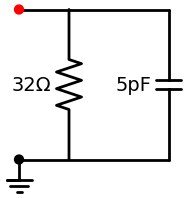

In [2]:
with schemdraw.Drawing():
    reddot = Dot(color='r')
    Line(d='right',l=1 )
    RL = Resistor(d='down',label='32Ω')
    Line(xy=RL.start,d='right',l=2 ) 
    Capacitor(d='down',label='5pF')
    Line(tox=reddot.end,d='left' )
    Ground()
    Dot()

Dit geeft een [admittantie](https://nl.wikipedia.org/wiki/Admittantie) van:

$$Y_L = \frac{1}{R}+ j \omega C$$

$$Y_L = \frac{1}{32}+ j \hspace{2mm} 2 \pi \cdot 500 \hspace{3mm} 10^6 \cdot 5\hspace{3mm}  10^{-12} $$

$$Y_L Z_o= 2+ j  \hspace{2mm}  1$$

We plaatsen de waarde van $Y_L Z_o$ op de Smith kaart van de admittantie en we draaien tot we de cirkel waarbij het reële deel van admittantie 1 is tegenkomen. Dit ziet er uit als in {numref}`smith71`. 

In [3]:
64*(1/32+2*np.pi*500e6j*5e-12)

(2+1.0053096491487337j)

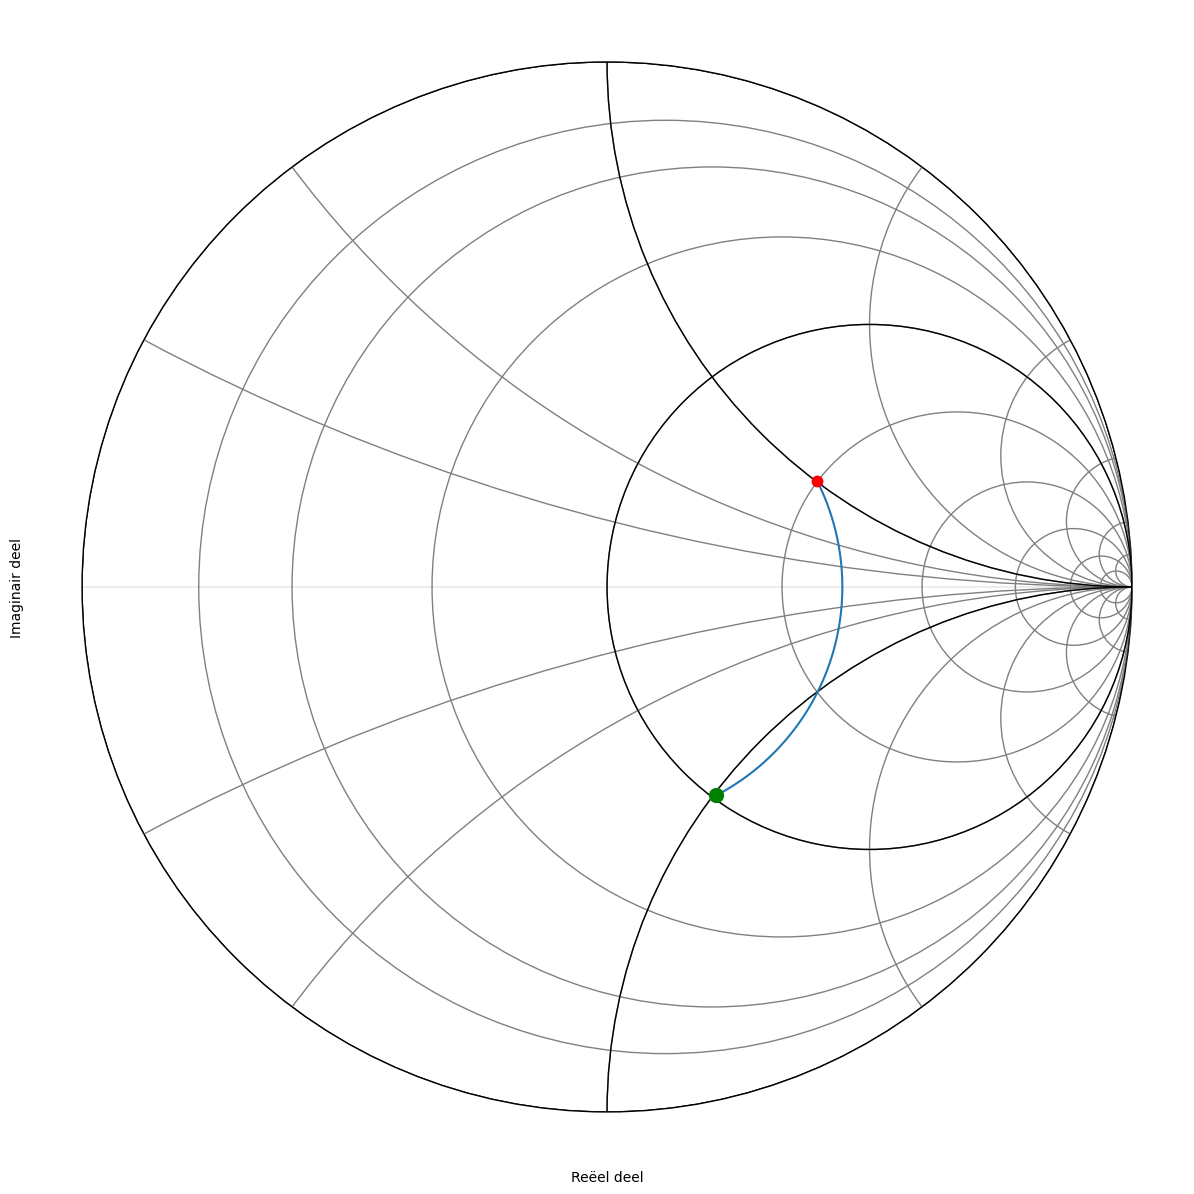

In [4]:
Z_L = 1/(1/32+2*np.pi*500e6j*5e-12)
Z_0 = 64
f_0_str = '0.5GHz'
freq = rf.Frequency(start=0.48, stop=0.52, npoints=5, unit='GHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
def smitplot(zlijn,Z_0,tt='z'):
    gamma=[(zl-Z_0)/(zl+Z_0) for zl in zlijn]
    fig,ax=plt.subplots(figsize=(15,15))
    rf.plotting.plot_smith(gamma, chart_type=tt, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)
    ax.plot([gamma[-1].real],[gamma[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gamma[0].real],[gamma[0].imag],color='red', marker=".", markersize=15)
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,90)]
smitplot(ylijn,Y_0)

In [5]:
1/64

0.015625

We kijken nu welke hoek we moeten draaien om deze cirkel te snijden. 
Aangezien de opgave was om dit zo kort mogelijk bij de belasting te doen, kiezen we voor het eerste snijpunt.
Op de kaart lezen we af dat dit na 90  graden is. We hebben dus een stukje van 41.0 mm nodig. In de tabel hieronder zien we dit in meer detail uitgewerkt. Hiervoor kijken we na wanneer de admittantie 1/(64 Ohm) bereikt. Dit is bij 15.625 mS.

In [6]:
ylijnpp=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(88,92)]
def ylijnprint(ylijn,golflengte=32.8):
    print('hoek    admittantie (Siemens)     lengte baantje op PCB (cm)')
    for i,yi in ylijn:
        print('{:4}    Y= {:-.2f}{:+.2f}j mS            lengte={:.2f} cm'.format(i,yi.real*1000,yi.imag*1000, i/360*golflengte/2))
ylijnprint(ylijnpp)

hoek    admittantie (Siemens)     lengte baantje op PCB (cm)
  88    Y= 16.19-15.94j mS            lengte=4.01 cm
  89    Y= 15.90-15.80j mS            lengte=4.05 cm
  90    Y= 15.62-15.67j mS            lengte=4.10 cm
  91    Y= 15.36-15.53j mS            lengte=4.15 cm


In [7]:
-6.48/1000*50

-0.324

Het imaginair gedeelte van de y waarde die we op de kaart aflezen is y=-1 j. We moeten dit dus compenseren door een imaginair deel van y=+1 j van de open transmissielijn.
We starten dus de cirkelboog bij y=0 (zie oranje lijn in {numref}`smith72`) en kijken waar deze de waarde van y=+1 j snijdt op de Smith kaart. De lengte van de boog die we hiervoor nodig hebben is 90 graden. Dit komt ook overeen met een lengte van 41.0 mm.

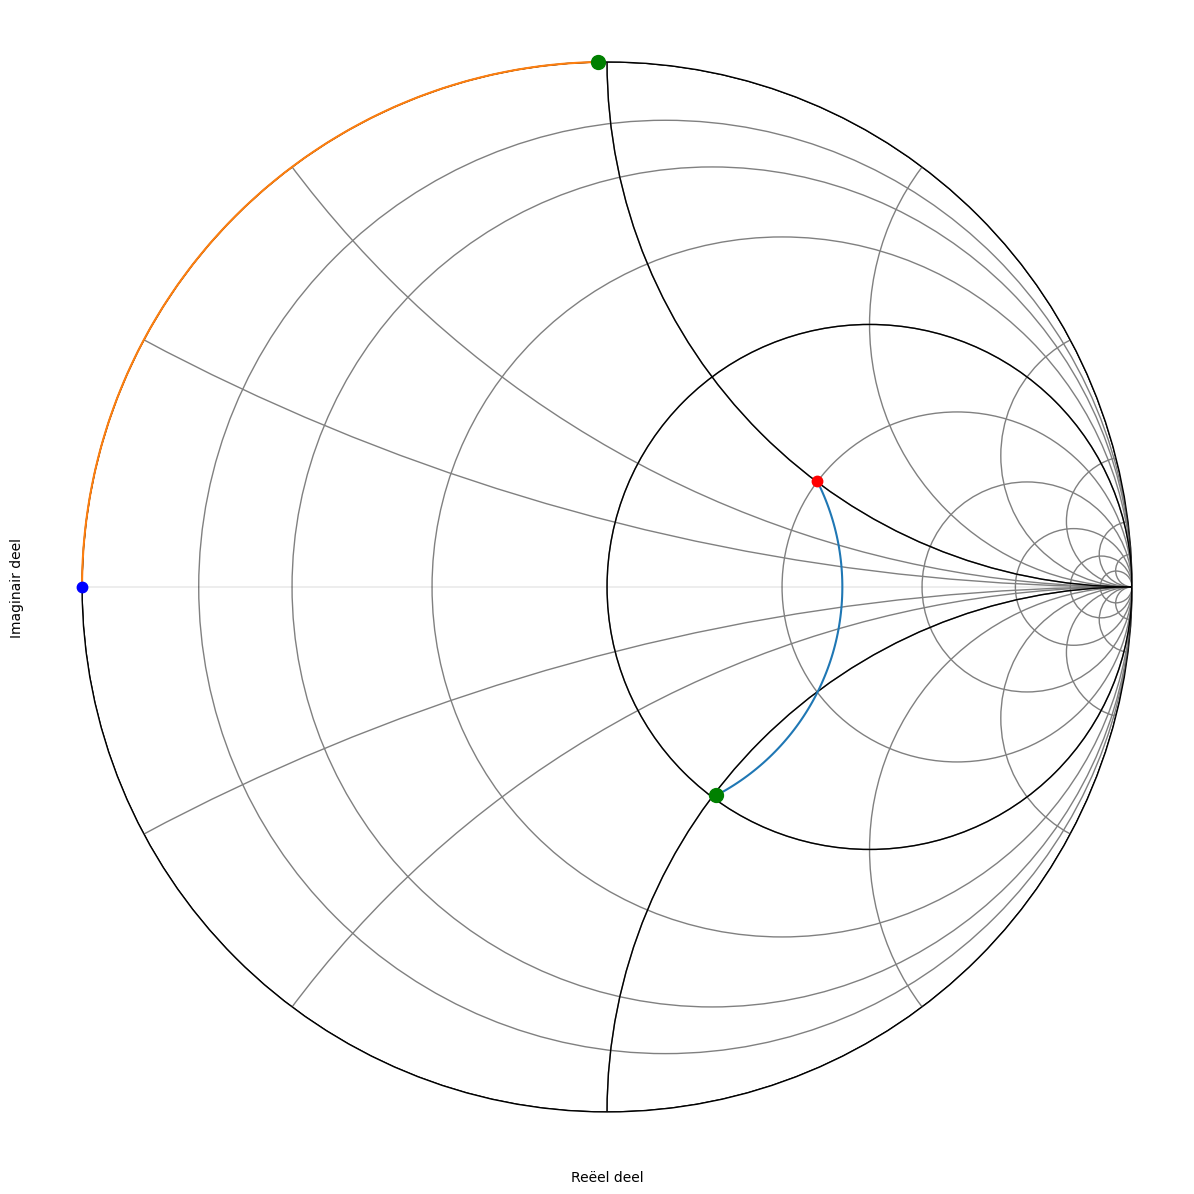

In [8]:
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
yopenlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,90)]

def smitplot2(ylijn,yopenlijn,Y_0):
    gamma=[(yl-Y_0)/(yl+Y_0) for yl in ylijn]
    gammaopen=[(yl-Y_0)/(yl+Y_0) for yl in yopenlijn]
    fig,ax=plt.subplots(figsize=(25,15))
    rf.plotting.plot_smith(gamma, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)
    ax.plot([g.real for g in gammaopen],[g.imag for g in gammaopen])
    ax.plot([gamma[-1].real],[gamma[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gamma[0].real],[gamma[0].imag],color='red', marker=".", markersize=15)
    ax.plot([gammaopen[-1].real],[gammaopen[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gammaopen[0].real],[gammaopen[0].imag],color='blue', marker=".", markersize=15)
smitplot2(ylijn,yopenlijn,Y_0)

We kunnen dit ook in tabelvorm uitwerken. Ook hier zoeken we een waarde van 15.625j mS Dit zie je dan hieronder weergegeven.

In [9]:
yopenlijn=[(i,1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(86,94)]

def ylijnprint2(ylijn,golflengte=32.8):
    print('hoek    admittantie (Siemens)     lengte coax (cm)')
    for i,yi in ylijn:
        print('{:4}       Y= {:+.2f}j mS     lengte={:.2f} cm'.format(i,yi.imag*1000, i/360*golflengte/2))

ylijnprint2(yopenlijn)

hoek    admittantie (Siemens)     lengte coax (cm)
  86       Y= +14.57j mS     lengte=3.92 cm
  87       Y= +14.83j mS     lengte=3.96 cm
  88       Y= +15.09j mS     lengte=4.01 cm
  89       Y= +15.35j mS     lengte=4.05 cm
  90       Y= +15.63j mS     lengte=4.10 cm
  91       Y= +15.90j mS     lengte=4.15 cm
  92       Y= +16.18j mS     lengte=4.19 cm
  93       Y= +16.47j mS     lengte=4.24 cm


{numref}`smith7cir` toont het schema dat we nodig hebben om deze oplossing te realiseren

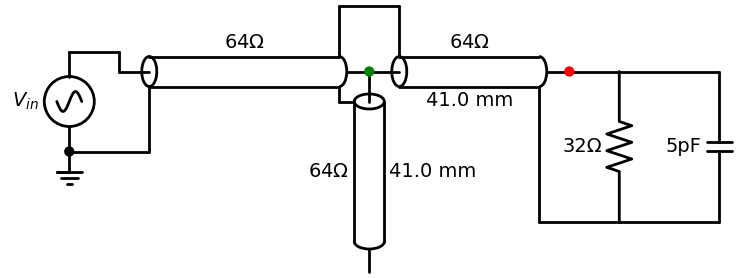

In [10]:
with schemdraw.Drawing() as d:
    d.add(Ground())
    d.add(Dot())
    bron=d.add(SourceSin(l=2.0,d='up', label=r'$V_{in}$'))
    d.add(Line(l=1,d='right') )
    d.add(Line(l=0.4,d='down') )
    coax1=d.add(Coax(d='right',length=5, label=r'$64\Omega$'))
    d.add(Dot(color='g'))
    coax3=d.add(Coax(xy=coax1.end,d='down',l=1.5,length=4, label=r'$64\Omega$', botlabel='41.0 mm'))
    d.add(Line(xy=coax1.shieldend,toy=coax3.shieldstart_top,d='down'))
    d.add(Line(tox=coax3.shieldstart,d='right'))
    coax2=d.add(Coax(xy=coax1.end,d='right',l=1.5,length=4, label=r'$64\Omega$', botlabel='41.0 mm'))
    d.add(Dot(color='r'))
    d.add(Line(xy=coax2.end,d='right',l=1 ))  
    RL=d.add(Resistor(d='down',label='32Ω'))
    d.add(Line(xy=RL.start,d='right',l=2 )) 
    d.add(Capacitor(d='down',label='5pF'))
    d.add(Line(tox=RL.end,d='left' )) 
    d.add(Line(xy=coax2.shieldend,toy=RL.end,d='down' )) 
    d.add(Line(tox=RL.end,d='right' )) 
    d.add(Line(xy=coax1.shieldend_top,l=1,d='up'))
    d.add(Line(tox=coax2.shieldstart_top,d='right') )     
    d.add(Line(toy=coax2.shieldstart_top,d='down') )     
    d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
    d.add(Line(toy=coax1.shieldstart,d='up') )

### Reflectie op 550 MHz

Om de reflectie van het signaal van 550 MHz te berekenen ter hoogte van het stukje open transmissielijn, berekenen we eerst de admittantie ($Y_L$) van de belasting:

$$Y_L = \frac{1}{R}+ j \omega C$$

$$Y_L = \frac{1}{32}+ j \hspace{2mm} 2 \pi \cdot (550 \hspace{2mm} 10^6) \cdot (5\hspace{2mm}  10^{-12}) $$

$$Y_L Z_o= 2+ j  \hspace{2mm}  1.1$$

$Y_L Z_o$ is dan de vertrekwaarde op de Smith kaart.

In [11]:
64*(1/32+2j*np.pi*550*5e-6)

(2+1.1058406140636072j)

Vervolgens moeten we weten hoegroot de golflengte is voor een 550 MHz signaal. Vertrekkende van de gegeven golflengte $\lambda_{PCB}$ voor het 500 MHz signaal kunnen we de golflengte van het 550 MHz signaal afleiden:

$$\lambda_{PCB,550}  = \frac {500}{550} \lambda_{PCB,500}$$

We bekomen dus een golflengte van 298 mm. De 2 baantjes van 41 mm zijn dus 13.75 % van de golflengte en we moeten zowel vanuit het punt van de antenne als het punt van de open transmissielijn een hoek van 99 graden draaien op de Smith kaart.

In [12]:
500/550*328, 41/298, 720* 41/298

(298.1818181818182, 0.13758389261744966, 99.06040268456375)

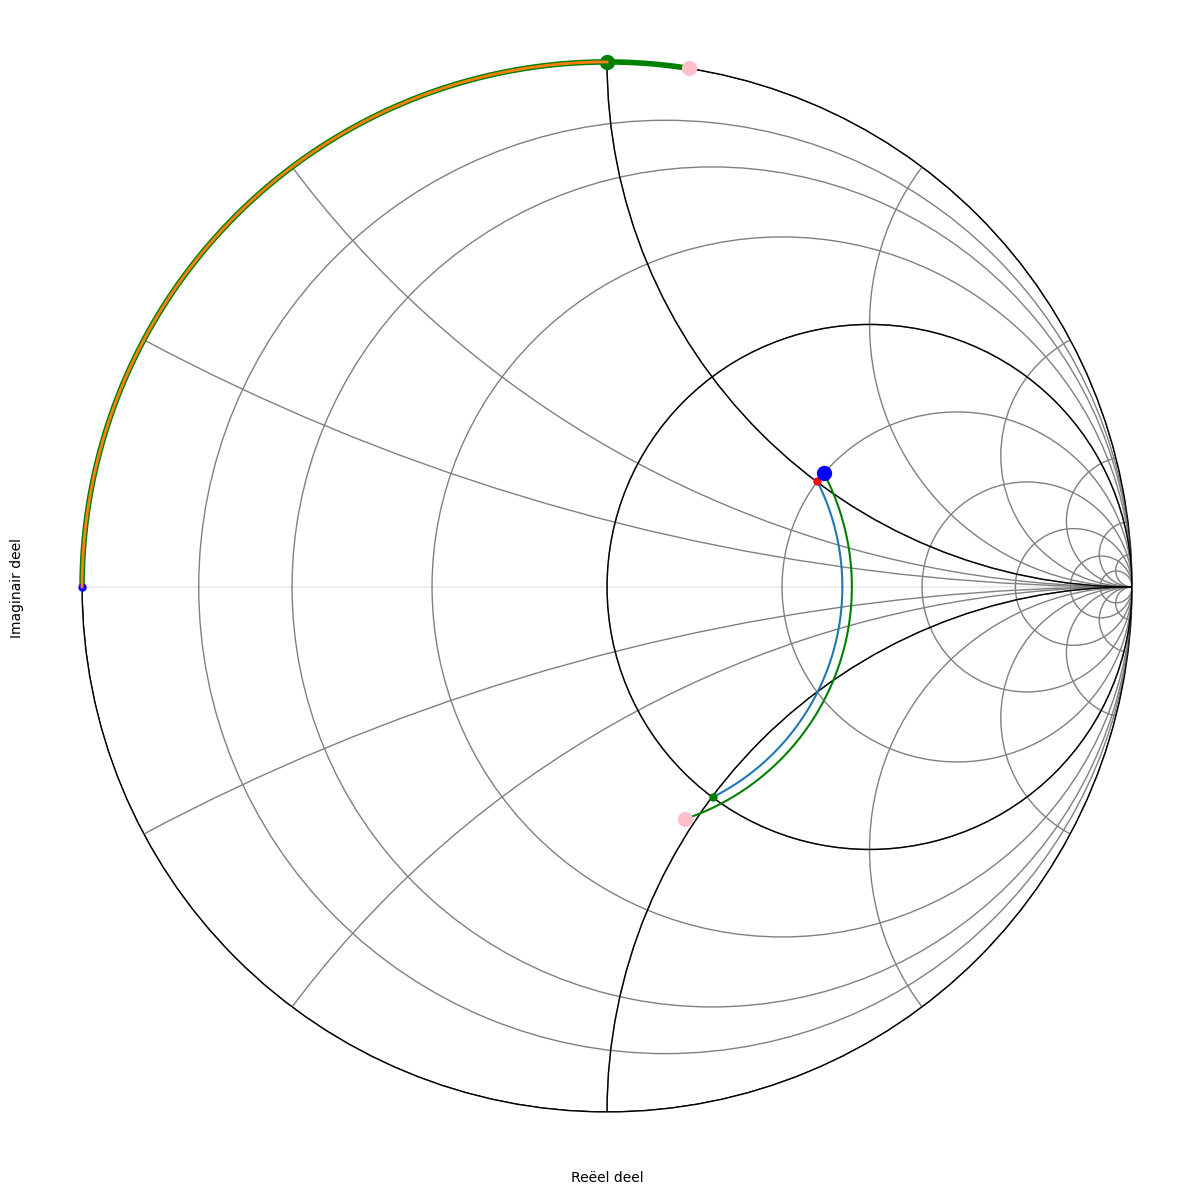

In [13]:
Z_0 = 64
Y_0=1/Z_0
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Z_L = 1/(1/32+2*np.pi*500e6j*5e-12)
Z_L2 = 1/(1/32+2*np.pi*550e6j*5e-12)
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,91)]
ylijn2=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L2), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,100)]
yopenlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,91)]
yopenlijn2=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,100)]
gamma=[(yl-Y_0)/(yl+Y_0) for yl in ylijn]
gamma2=[(yl-Y_0)/(yl+Y_0) for yl in ylijn2]
gammaopen=[(yl-Y_0)/(yl+Y_0) for yl in yopenlijn]
gammaopen2=[(yl-Y_0)/(yl+Y_0) for yl in yopenlijn2]

fig,ax=plt.subplots(figsize=(15,15))
rf.plotting.plot_smith(gamma, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)
ax.plot([g.real for g in gammaopen],[g.imag for g in gammaopen],linewidth=2,zorder=5)
ax.plot([g.real for g in gammaopen2],[g.imag for g in gammaopen2],linewidth=4,color='green')
ax.plot([g.real for g in gamma2],[g.imag for g in gamma2],color='green')
ax.plot([gamma[-1].real],[gamma[-1].imag],color='green', marker=".", markersize=10)
ax.plot([gamma[0].real],[gamma[0].imag],color='red', marker=".", markersize=10)
ax.plot([gammaopen[-1].real],[gammaopen[-1].imag],color='green', marker=".", markersize=20)
ax.plot([gammaopen[0].real],[gammaopen[0].imag],color='blue', marker=".", markersize=10)
ax.plot([gammaopen2[-1].real],[gammaopen2[-1].imag],color='pink', marker=".", markersize=20);
ax.plot([gamma2[-1].real],[gamma2[-1].imag],color='pink', marker=".", markersize=20)
ax.plot([gamma2[0].real],[gamma2[0].imag],color='blue', marker=".", markersize=20);

In [14]:
1/(ylijn[-1]+yopenlijn[-1]), 1/(ylijn2[-1]+yopenlijn2[-1]),(ylijn2[-1]+yopenlijn2[-1])*64

(np.complex128(64+0.16990877275945293j),
 np.complex128(70.88620602129248-17.455525948962876j),
 np.complex128(0.8512383848841492+0.20961502314900715j))

De Smithkaart in {numref}`smith73` toont het verschil tussen de admittanties bekomen bekomen aan 500 MHz (groene dots) en de admittanties bekomen bekomen aan 550 MHz (roze dots). Wanneer we de op de Smithkaart afgelezen waardes van de 2 groene dots optellen bekomen we 1, wat overeenkomt met een belasting van 64 Ohm en een aangepaste transmissielijn.  Wanneer we de op de smithkaart afgelezen waardes van de 2 roze dots optellen bekomen we 0.85 +0.2 j, wat overeenkomt met een belasting van 70.9-17.5 j Ohm. 

In [15]:
ZL2=1/(ylijn2[-1]+yopenlijn2[-1])
(ZL2-Z_0)/(ZL2+Z_0)

np.complex128(0.06668201847465817-0.12078000208989162j)

De reflectiecoëfficiënt die we dan bekomen op 550 MHz is:

$$ \rho= \frac{Z_L-Z_0}{Z_L+Z_0}= 0.07-0.12 j$$